In [2]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import swifter
warnings.filterwarnings("ignore")

In [33]:
train_1 = pd.read_parquet('Datasets/train_essays.parquet')
train_1 = train_1[["text", "generated"]]
train_1 = train_1.rename(columns={'generated' : 'label'})

train_2 = pd.read_csv('Datasets/train.csv')
train_2 = train_2.rename(columns={'label' : 'generated'})

train_3 = pd.read_csv('Datasets/train_essays.csv')
train_3 = train_3.rename(columns={'label' : 'generated'})
train_3 = train_3[["text", "generated"]]


train_df = pd.concat([train_1, train_2, train_3], axis=0, ignore_index=True)
train_df

,text,generated
0,"In recent years, there has been a growing move...",1
1,---\nWhy not cars in our life\n===============...,1
2,A car is considered by many a nessecity for ev...,1
3,"H\n\nello fellow citezens , we are here to inf...",0
4,Have you ever known how if feels not being abl...,1
...,...,...
175140,There has been a fuss about the Elector Colleg...,0
175141,Limiting car usage has many advantages. Such a...,0
175142,There's a new trend that has been developing f...,0
175143,As we all know cars are a big part of our soci...,0


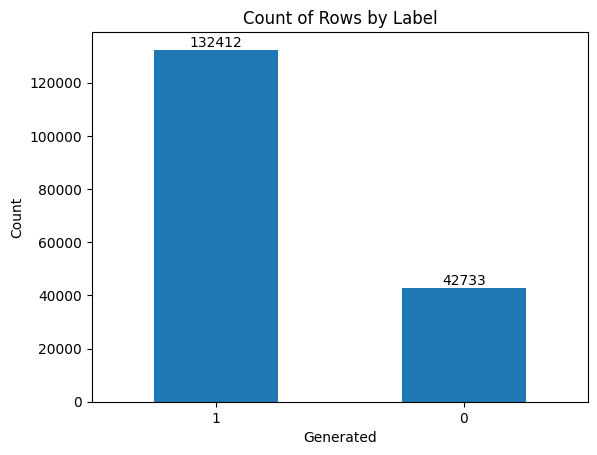

In [34]:
# Count the occurrences of each label (0 and 1)
label_counts = train_df['generated'].value_counts()
ax = label_counts.plot(kind='bar')
plt.title('Count of Rows by Label')
plt.xlabel('Generated')
plt.ylabel('Count')
for i, count in enumerate(label_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

In [21]:
def clean_text(text):
    # Remove Twitter handles starting with '@'
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

In [22]:
train_df['text'] = train_df['text'].swifter.apply(clean_text)

Pandas Apply: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175145/175145 [00:24<00:00, 7144.56it/s]


In [23]:
train_df

,text,generated
0,in recent years there has been a growing movem...,1
1,why not cars in our life i have ever met a hu...,1
2,a car is considered by many a nessecity for ev...,1
3,h ello fellow citezens we are here to inform y...,0
4,have you ever known how if feels not being abl...,1
...,...,...
175140,there has been a fuss about the elector colleg...,0
175141,limiting car usage has many advantages such as...,0
175142,theres a new trend that has been developing fo...,0
175143,as we all know cars are a big part of our soci...,0


In [28]:
train_df.to_csv("Cleaned_Datasets/train.csv", index = False)

In [32]:
test = pd.read_parquet('Datasets/valid_essays.parquet')
test = test[["text", "generated"]]
test['text'] = test['text'].swifter.apply(clean_text)
test.to_csv("Cleaned_Datasets/test.csv", index = False)
test

Pandas Apply: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1679/1679 [00:00<00:00, 2310.85it/s]


,text,generated
0,and it has to do with the fact that if you ha...,1
1,there are advantages of limiting car usage les...,1
2,limiting car usage ii very beneifial to not on...,1
3,cars have been one of the most advanced invent...,1
4,are cars even really necessary vehicles can ca...,1
...,...,...
1674,he stood there looking at his own grave the wi...,1
1675,crummable what a crummy word she thought pulli...,0
1676,title the awakening in a different realm word ...,1
1677,title the timekeepers descent silence engulfed...,1
